Imports

In [1]:
from pathlib import Path
from tqdm import tqdm

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
# Create the colormap
colors = [(0, 191/255, 149/255), (191/255,0,42/255)]
ur2 = sns.color_palette(colors)

Load trial data

In [4]:
path_data = Path('data/trials_BriefAC-v2_rt-cleaned.csv')

df_trials = pd.read_csv(path_data)

df_trials.head()

,Unnamed: 0,subID,keyYes,trialNr,picID,Context,Action,Compatibility,PT,ProbeType,Probe,CorrectResponse,Response,RT,transRT,zRT
0,0,1,39,3,389,workshop,hammering,compatible,83,Scene,workshop,39,37,1221.3,0.693395,0.959455
1,1,1,39,4,315,office,hammering,incompatible,50,Action,hammering,39,39,1014.3,0.867728,1.171207
2,2,1,39,5,324,office,sawing,incompatible,50,Action,stamping,37,37,921.3,0.799823,0.815164
3,3,1,39,6,341,office,hole-punching,compatible,33,Scene,workshop,37,37,688.0,0.591583,0.025715
4,4,1,39,7,267,kitchen,hole-punching,incompatible,50,Action,hole-punching,39,39,690.1,0.598509,-0.240382


Load summary (d-prime) data

In [7]:
path_summary = Path('data/summary_data_cleaned-rt.csv')

df_summary = pd.read_csv(path_summary)

df_summary.head()

,Unnamed: 0,subID,PT,Compatibility,ProbeType,n_hits,n_falarms,n_correjections,n_misses,dprime
0,0,1,33,compatible,Action,2,0,18,15,0.727674
1,1,1,33,compatible,Scene,5,3,14,13,0.339444
2,2,1,33,incompatible,Action,3,1,17,14,0.664319
3,3,1,33,incompatible,Scene,2,3,13,16,-0.333494
4,4,1,50,compatible,Action,4,7,10,14,-0.541702


Load accuracies

In [9]:
path_accuracy = Path('data/accuracy_cleaned-rt.csv')

df_accuracy = pd.read_csv(path_accuracy)

df_accuracy.head()

,Unnamed: 0,subID,PT,Compatibility,ProbeType,Probe,Accuracy
0,0,1,33,compatible,Action,cutting,0.6
1,1,1,33,compatible,Action,grating,1.0
2,2,1,33,compatible,Action,hammering,0.5
3,3,1,33,compatible,Action,hole-punching,0.6
4,4,1,33,compatible,Scene,kitchen,0.5


# Plotting

## Accuracy

Probe-wise

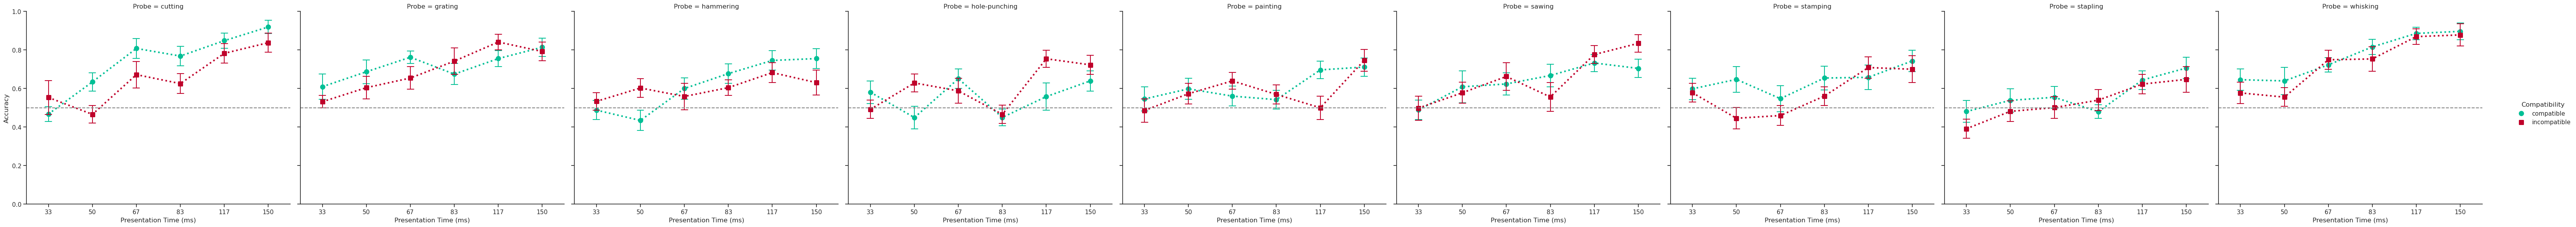

In [18]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='Accuracy', hue='Compatibility', col='Probe',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy[df_accuracy.ProbeType == 'Action'],
                palette=ur2,
                kind="point",
                markers=["o", "s"], linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.2, scale=1.1
                )
g.refline(y=0.5)
g.set(ylim=((0, 1)))
g.set_axis_labels("Presentation Time (ms)", "Accuracy")
#g.axes[0,0].set_title('Action')
#g.axes[0,1].set_title('Scene')
plt.savefig('plots/accuracy_probes-action.png', dpi=250)
plt.show()

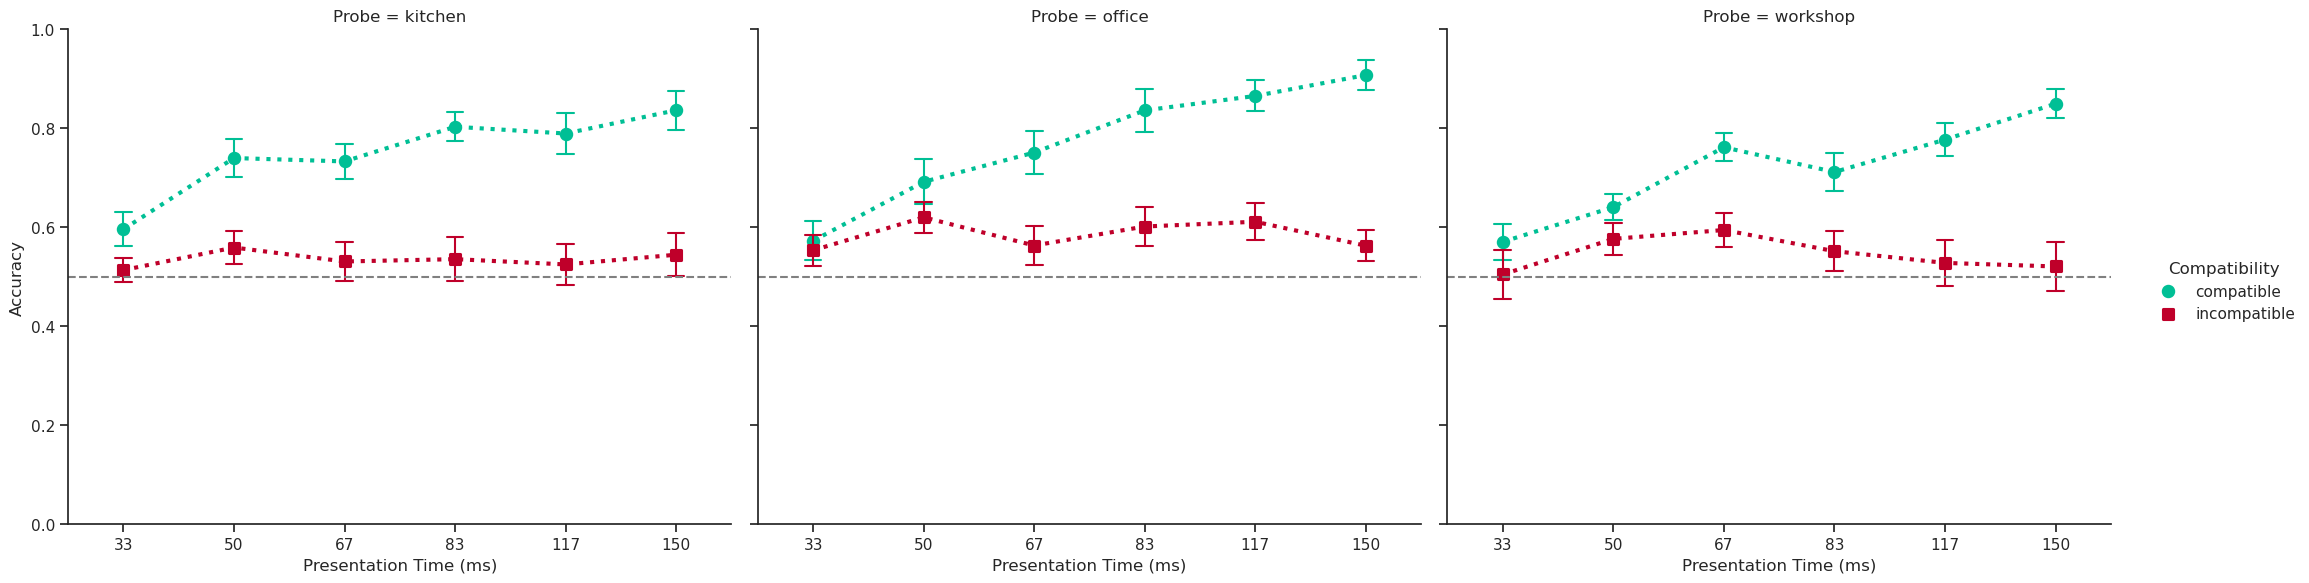

In [17]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='Accuracy', hue='Compatibility', col='Probe',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy[df_accuracy.ProbeType == 'Scene'],
                palette=ur2,
                kind="point",
                markers=["o", "s"], linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.2, scale=1.1
                )
g.refline(y=0.5)
g.set(ylim=((0, 1)))
g.set_axis_labels("Presentation Time (ms)", "Accuracy")
#g.axes[0,0].set_title('Action')
#g.axes[0,1].set_title('Scene')
plt.savefig('plots/accuracy_probes-scene.png', dpi=250)
plt.show()

All in one

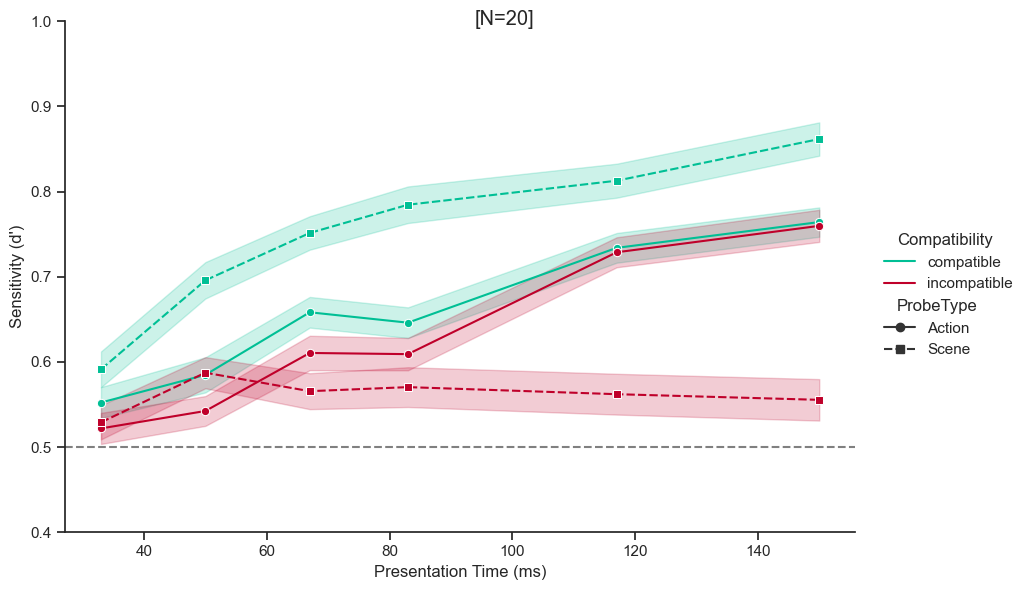

In [10]:
sns.set_theme(style="ticks")
errorbar = 'se' 
fformat = 'png'
g = sns.relplot(x='PT', y='Accuracy', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy,
                palette=ur2,
                kind="line",
                markers=["o", "s"],
                errorbar=errorbar,
                height=6, aspect=1.5,
                )
g.refline(y=.5)
g.set(ylim=((.4, 1)))
g.set_axis_labels("Presentation Time (ms)", "Sensitivity (d')")
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig(f'plots/accuracy_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

## Sensitivity (d-prime)

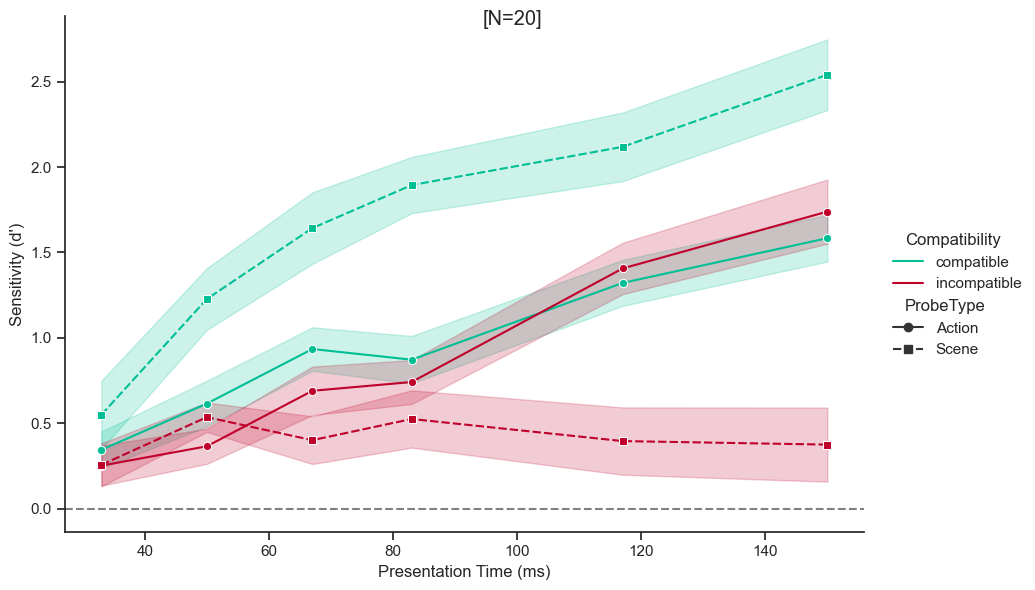

In [11]:
sns.set_theme(style="ticks")
errorbar = 'se' 
fformat = 'png'
g = sns.relplot(x='PT', y='dprime', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_summary, #order=[33,  50,  67,  83, 100, 116, 133],
                palette=ur2,
                kind="line",
                markers=["o", "s"],
                errorbar=errorbar,
                height=6, aspect=1.5,
                )
g.refline(y=0)
g.set_axis_labels("Presentation Time (ms)", "Sensitivity (d')")
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig(f'plots/dprime_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

Compatible pairs (typical comparison)

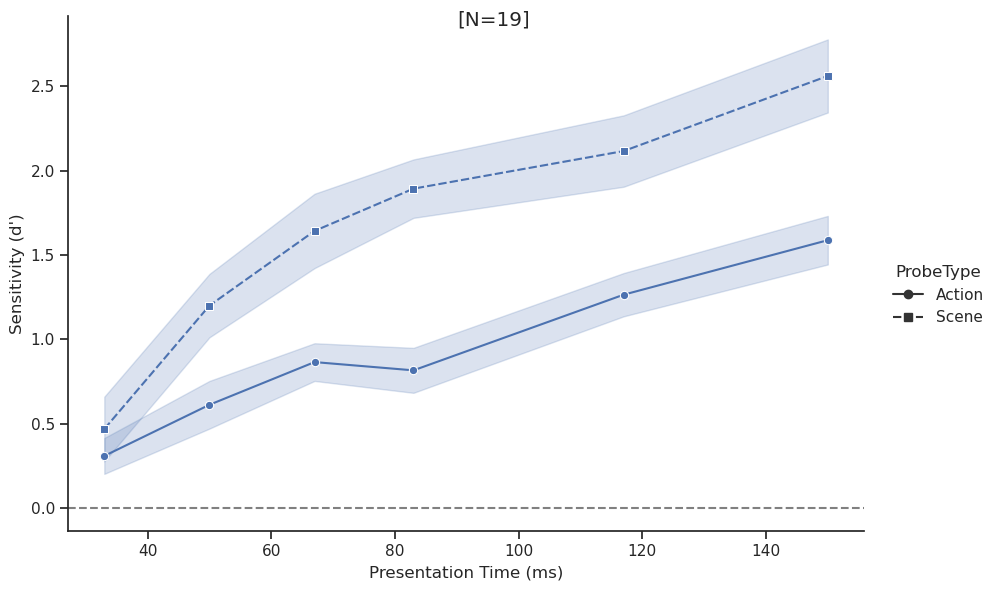

In [29]:
sns.set_theme(style="ticks")
errorbar = 'se' 
fformat = 'png'
g = sns.relplot(x='PT', y='dprime', style='ProbeType',
                data=df_summary[df_summary.Compatibility == 'compatible'], #order=[33,  50,  67,  83, 100, 116, 133],
                kind="line",
                markers=["o", "s"],
                errorbar=errorbar,
                height=6, aspect=1.5,
                )
g.refline(y=0)
g.set_axis_labels("Presentation Time (ms)", "Sensitivity (d')")
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig(f'plots/dprime_compatible_{errorbar}.{fformat}', dpi=250)
plt.show()

### Distributions

Compatible

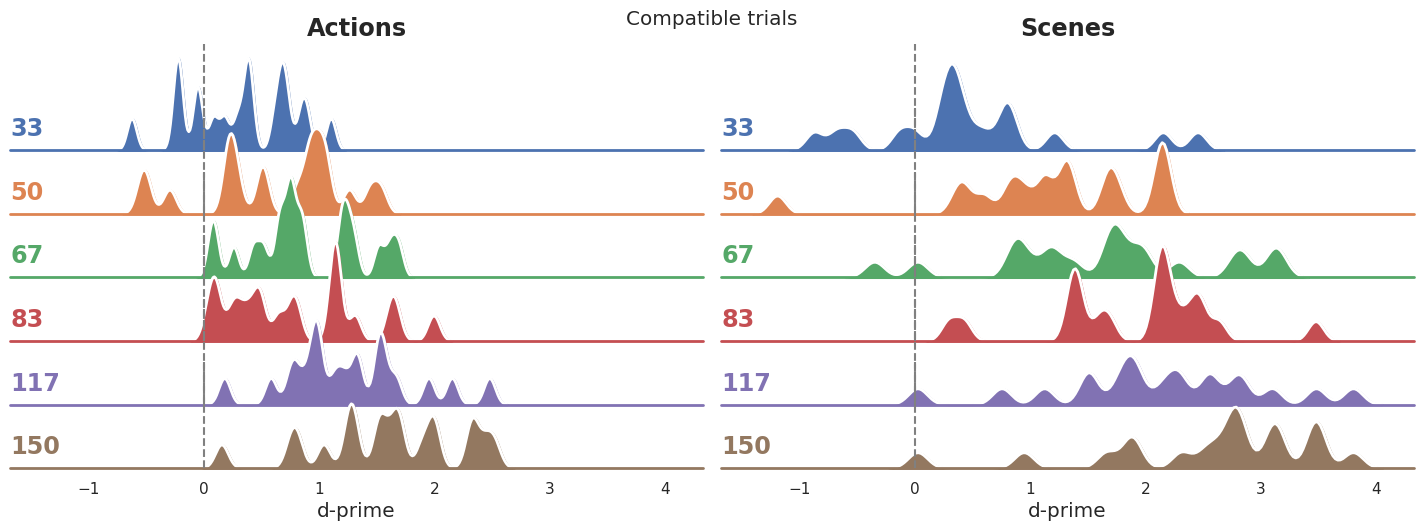

In [30]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_summary[(df_summary.Compatibility == 'compatible')],
                  row="PT", hue="PT",
                  col="ProbeType",
                  col_order=['Action', 'Scene'],
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.16
g.map(sns.kdeplot, "dprime",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dprime", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='x-large', color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "PT")

# Remove axes details that don't play well with overlap

# Titles
g.set_titles("")
fontdict = {
    'fontsize' : 'x-large',
    'fontweight' : 'bold'
}
g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('d-prime', fontdict)
g.axes[-1, 1].set_xlabel('d-prime', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

g.refline(x=0)

plt.suptitle('Compatible trials')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.4)

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_dprime_AvS_compatible.png', dpi=250)
plt.show()

Incompatible

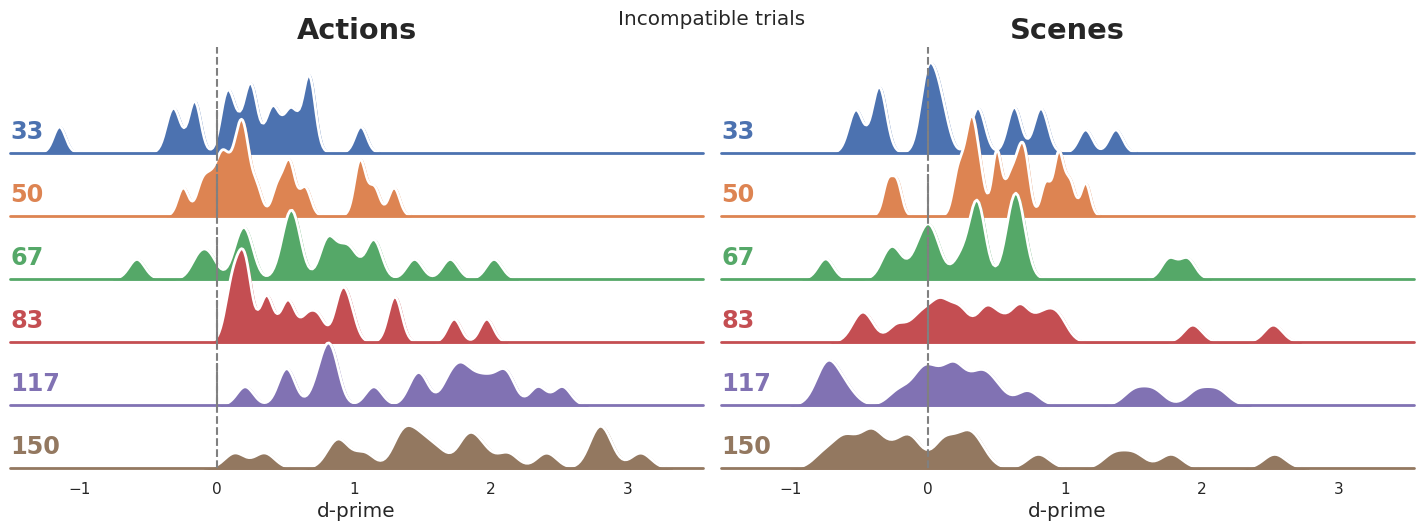

In [31]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_summary[(df_summary.Compatibility == 'incompatible')],
                  row="PT", hue="PT",
                  col="ProbeType",
                  col_order=['Action', 'Scene'],
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.16
g.map(sns.kdeplot, "dprime",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dprime", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='x-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}

g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('d-prime', fontdict)
g.axes[-1, 1].set_xlabel('d-prime', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

g.refline(x=0)

plt.suptitle('Incompatible trials')
plt.xlabel('d-prime')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.4)

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_dprime_AvS_incompatible.png', dpi=250)
plt.show()

Individuals

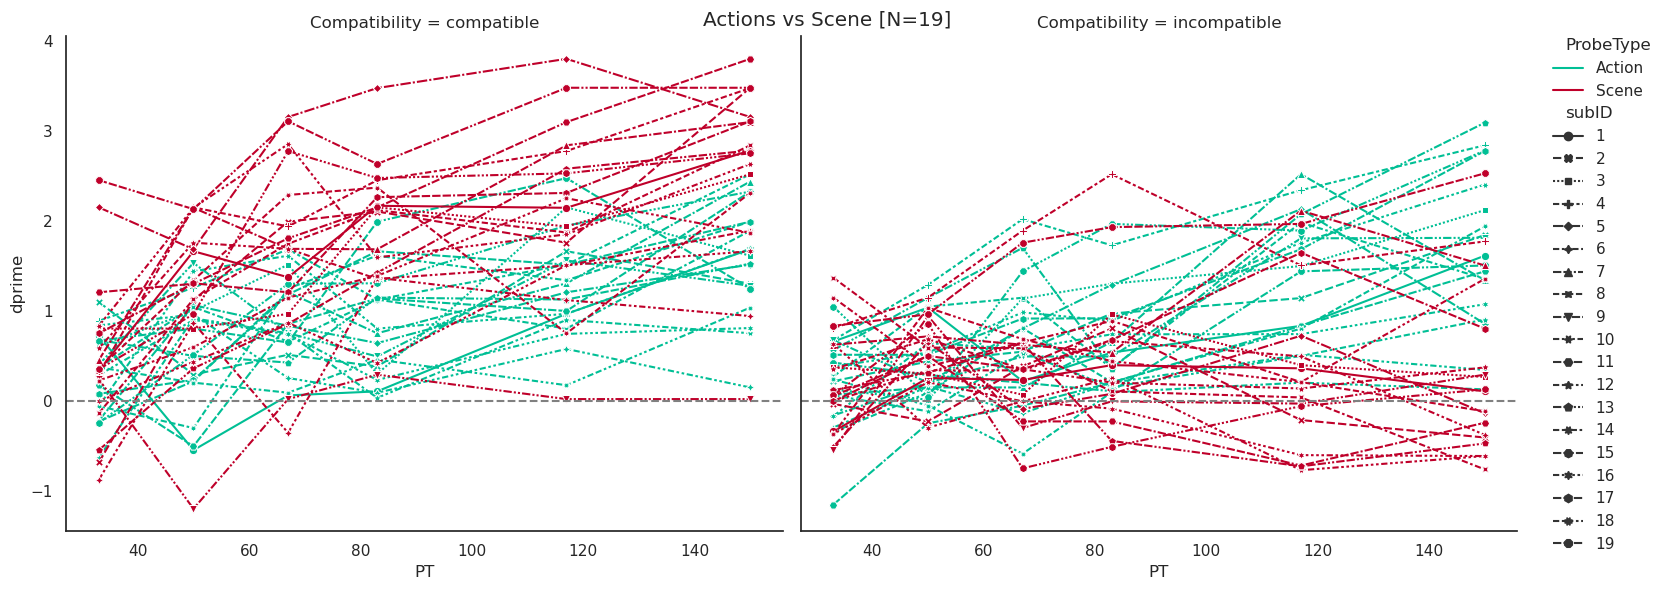

In [39]:
g = sns.relplot(x='PT', y='dprime', hue='ProbeType', style='subID', col='Compatibility',
                data=df_summary,
                palette=ur2,
                markers=True,
                kind='line', height=6, aspect=1.3,
                errorbar='se'
                )
g.refline(y=0)
g.tight_layout()
plt.suptitle(f'Actions vs Scene [N={df_summary.subID.max()}]')
plt.savefig('plots/dprime_individuals_compatibility.png', dpi=250)
plt.show()

## Reaction Time

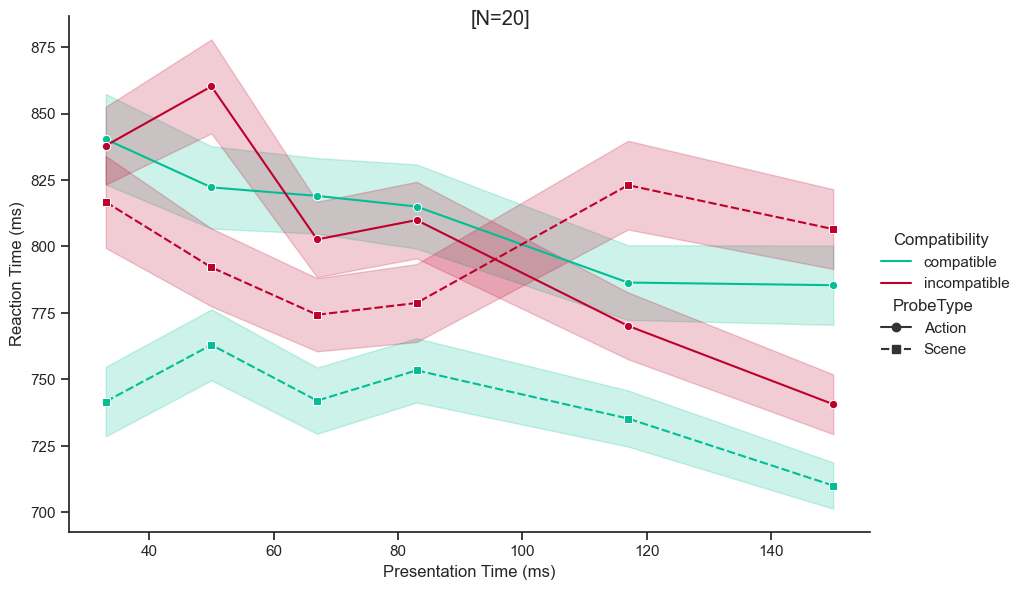

In [12]:
sns.set_theme(style="ticks")
g = sns.relplot(x='PT', y='RT', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_trials[df_trials.CorrectResponse == df_trials.Response],
                palette=ur2,
                kind="line",
                markers=["o", "s"],
                errorbar="se",
                height=6, aspect=1.5,
                )
g.set_axis_labels("Presentation Time (ms)", "Reaction Time (ms)")
#g.set(xlim=(25, 160))
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig('plots/rt_all-in-one.png', dpi=250)
plt.show()

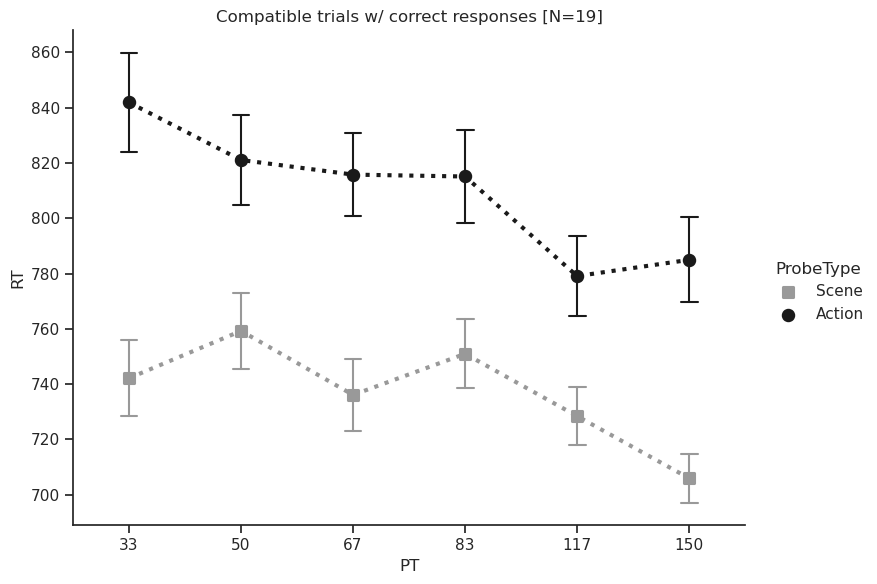

In [35]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='RT', hue='ProbeType',
                data=df_trials[
                    (df_trials.Compatibility == 'compatible') &
                    (df_trials.CorrectResponse == df_trials.Response)],
                palette=['0.6', 'k'],
                kind="point",
                markers=["s", "o"], linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.3, scale=1.1
                )
g.axes[0,0].set_title(f'Compatible trials w/ correct responses [N={df_trials.subID.max()}]')
g.tight_layout()
plt.savefig('plots/rt_compatible&correct.png', dpi=250)
plt.show()

Distributions

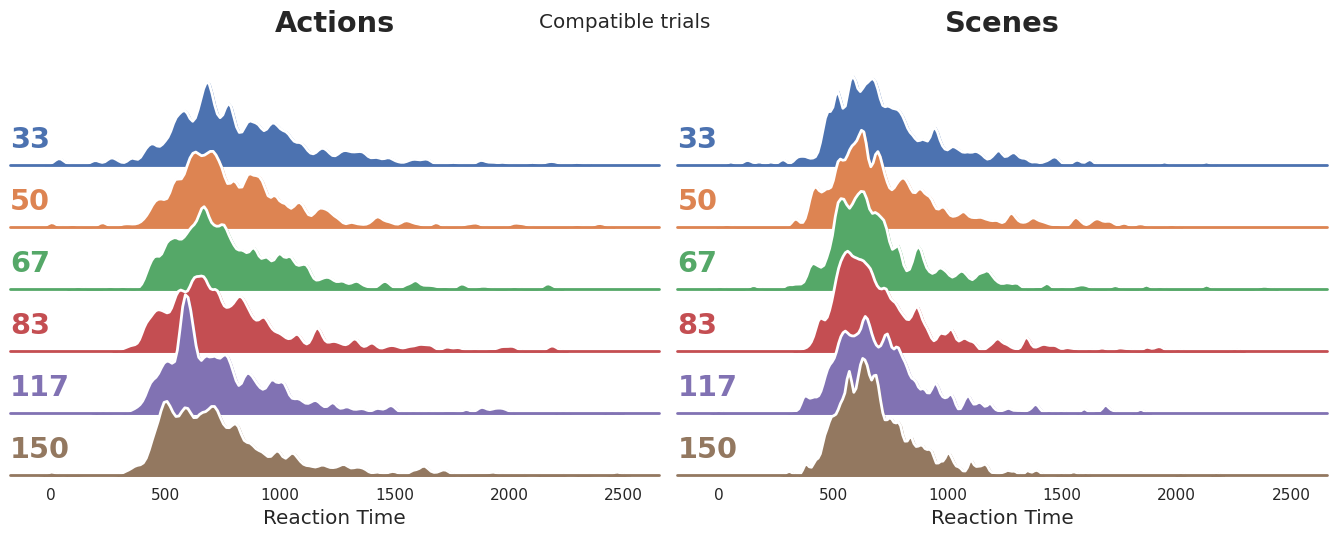

In [36]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_trials[(df_trials.Compatibility == 'compatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                  col_order=['Action', 'Scene'],
                  row="PT", hue="PT",
                  col="ProbeType",
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.18
g.map(sns.kdeplot, "RT",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "RT", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='xx-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)


# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}
g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('Reaction Time', fontdict)
g.axes[-1, 1].set_xlabel('Reaction Time', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.suptitle('Compatible trials')

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_rt_AvS_compatible.png', dpi=250)
plt.show()

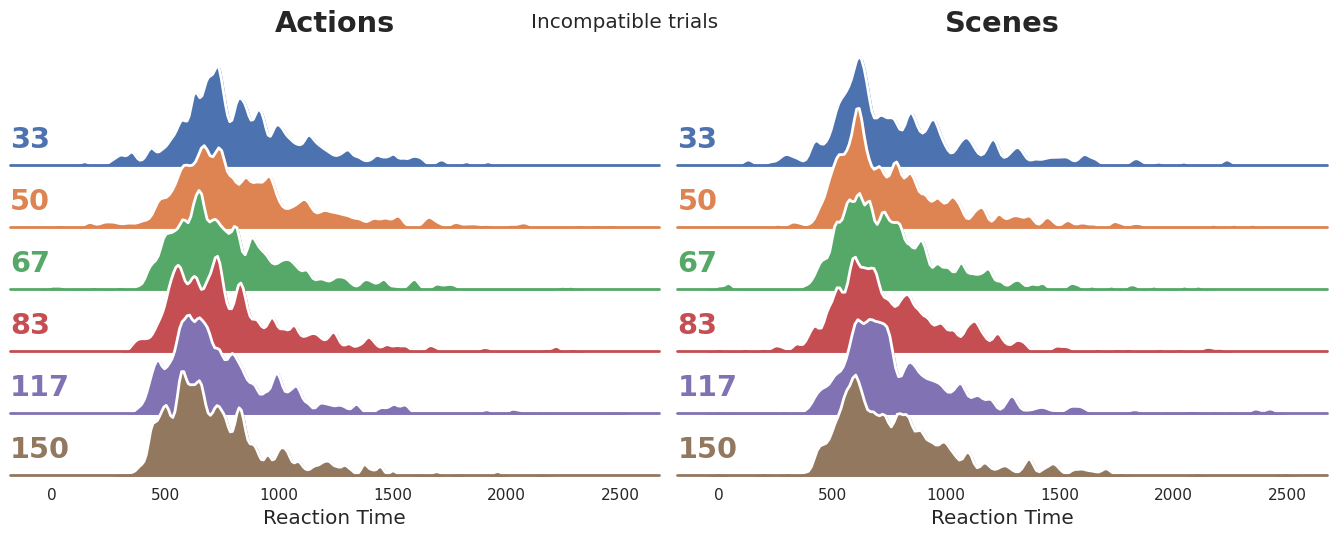

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_trials[(df_trials.Compatibility == 'incompatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                  col_order=['Action', 'Scene'],
                  row="PT", hue="PT",
                  col="ProbeType",
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.18
g.map(sns.kdeplot, "RT",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "RT", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='xx-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)


# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}

g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('Reaction Time', fontdict)
g.axes[-1, 1].set_xlabel('Reaction Time', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.suptitle('Incompatible trials')

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_rt_AvS_incompatible.png', dpi=250)
plt.show()

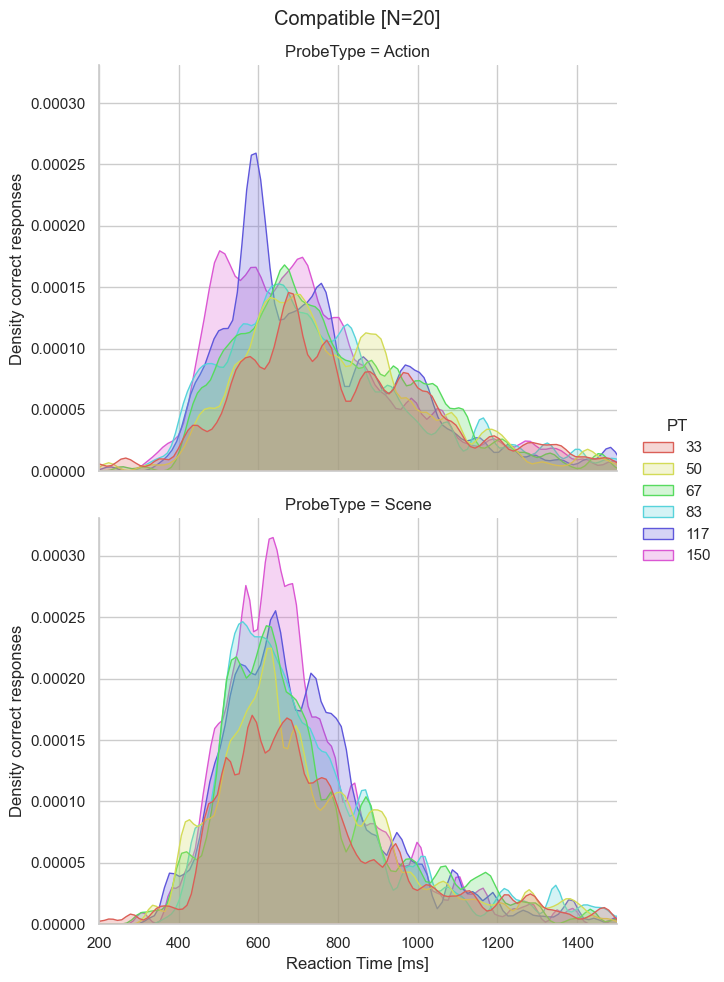

In [15]:
sns.set_theme(style='whitegrid')
g = sns.displot(x='RT', hue='PT', row='ProbeType',
                row_order=['Action', 'Scene'],
                kind="kde",
                data=df_trials[(df_trials.Compatibility == 'compatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                palette=sns.color_palette('hls', 6),
                aspect=1.3,
                bw_adjust=.2, fill=True
                )
g.set_axis_labels("Reaction Time [ms]", "Density correct responses")
g.set(xlim=(200, 1500))
plt.suptitle(f'Compatible [N={df_summary.subID.max()}]')
g.tight_layout()
plt.savefig('plots/distrib-rt_compatible_vertical.png', dpi=250)
plt.show()

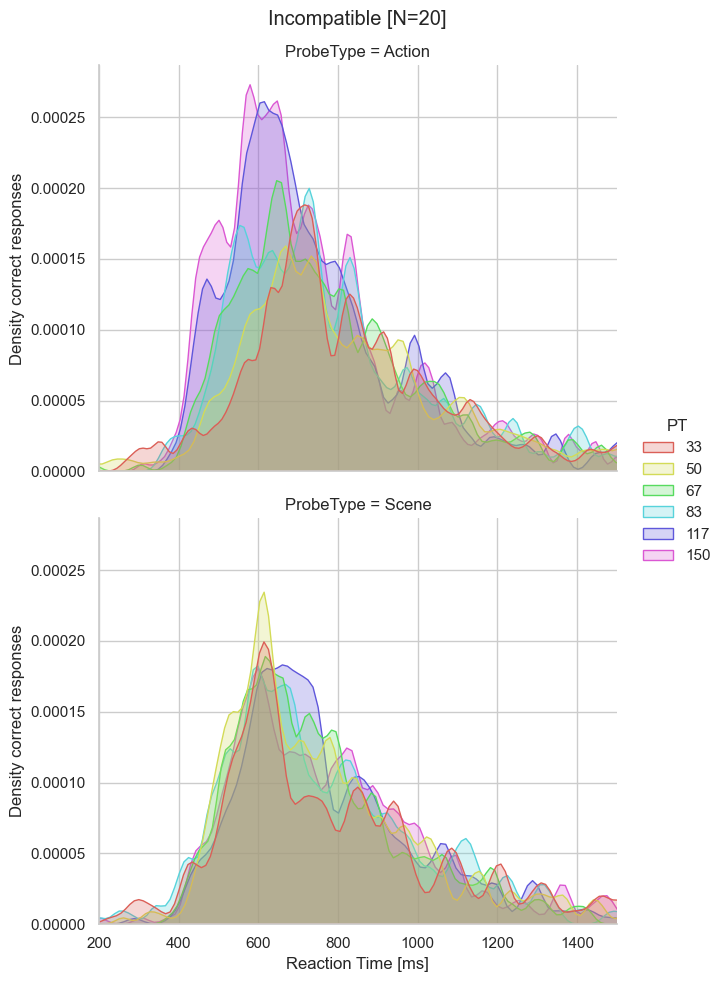

In [14]:
sns.set_theme(style='whitegrid')
g = sns.displot(x='RT', hue='PT', row='ProbeType',
                row_order=['Action', 'Scene'],
                kind="kde",
                data=df_trials[(df_trials.Compatibility == 'incompatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                palette=sns.color_palette('hls', 6),
                aspect=1.3,
                bw_adjust=.2, fill=True
                )
g.set_axis_labels("Reaction Time [ms]", "Density correct responses")
g.set(xlim=(200, 1500))
plt.suptitle(f'Incompatible [N={df_summary.subID.max()}]')
g.tight_layout()
plt.savefig('plots/distrib-rt_incompatible_vertical.png', dpi=250)
plt.show()

Individuals

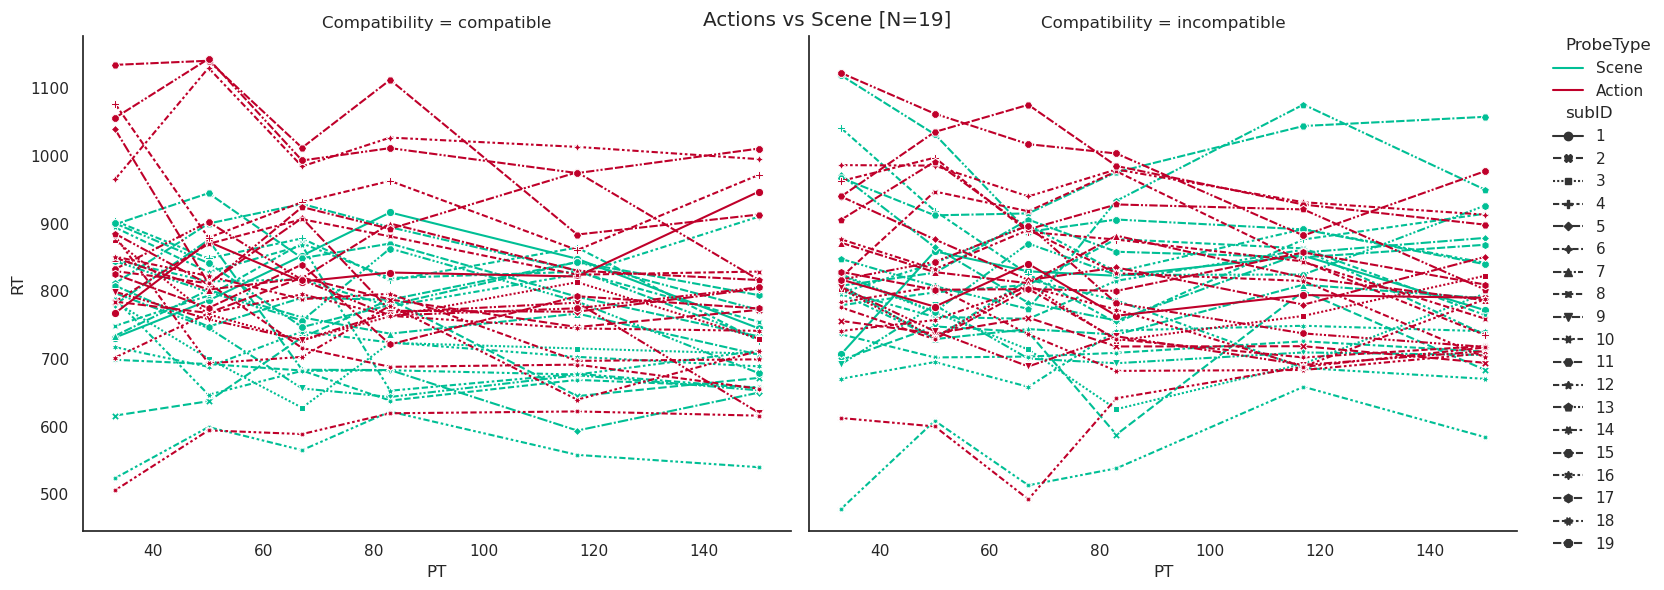

In [43]:
g = sns.relplot(x='PT', y='RT', hue='ProbeType', style='subID', col='Compatibility',
                data=df_trials,
                palette=ur2,
                markers=True,
                kind='line', height=6, aspect=1.3,
                errorbar=None
                )
g.tight_layout()
plt.suptitle(f'Actions vs Scene [N={df_summary.subID.max()}]')
plt.savefig('plots/rt_individuals_compatibility.png', dpi=250)
plt.show()

## Speed-accuracy trade-off

### RT-d' correlation

Measure the speed-accuracy trade-off within probe type and PT, by correlating the sensitivity with reaction time.

Similar to Bacon-Mace et al. (2007):
>*For each SOA condition, the Pearson correlation was calculated between the mean accuracy and the mean reaction time of each participant. Each bar thus represents a correlation index that takes into account as many points as there are participants in a given experiment.*

In [ ]:
df_summary

,subID,PT,Compatibility,ProbeType,n_hits,n_falarms,n_correjections,n_misses,dprime
0,1,33,compatible,Action,2,0,18,16,0.693865
1,1,33,compatible,Scene,5,3,15,13,0.377966
2,1,33,incompatible,Action,3,1,17,14,0.664319
3,1,33,incompatible,Scene,2,3,15,16,-0.253219
4,1,50,compatible,Action,4,7,11,14,-0.482494
...,...,...,...,...,...,...,...,...,...
379,16,117,incompatible,Scene,3,5,13,15,-0.377966
380,16,150,compatible,Action,14,8,10,4,0.904420
381,16,150,compatible,Scene,10,1,17,8,1.732929
382,16,150,incompatible,Action,13,5,13,5,1.178912


In [ ]:
a_sub      = np.unique(df_trials.subID)
a_prestime  = np.unique(df_trials.PT)
a_comp      = np.unique(df_trials.Compatibility)
a_ptype     = np.unique(df_trials.ProbeType)
l_meanRT = []

# Iterate over subjects
for i in tqdm(range(len(a_subs))):
    subID = a_sub[i]
    # Iterate over Probe Type
    for j in range(len(a_ptype)):
        ptype = a_ptype[j]
        # Iterate over Compatibility
        for k in range(len(a_comp)):
            compatibility = a_comp[k]
            # Iterate over PT
            for l in range(len(a_prestime)):
                prestime = a_prestime[l]
                rt_mean = df_trials[
                            (df_trials.subID == subID) & 
                            (df_trials.ProbeType == ptype) &
                            (df_trials.Compatibility == compatibility) &
                            (df_trials.PT == prestime)
                            ].groupby([
                                'subID', 'ProbeType','Compatibility','PT'
                                ]).mean('RT').RT.values[0]
                l_meanRT.append([subID, ptype, compatibility, prestime, rt_mean])
                
df_meanRT = pd.DataFrame(l_meanRT,
                         columns=['subID', 'ProbeType', 'Compatibility', 'PT', 'meanRT'])
df_summary_rt = df_summary.merge(df_meanRT).drop([
    'n_hits', 'n_falarms', 'n_correjections', 'n_misses'], axis=1)
df_summary_rt

100%|██████████| 19/19 [00:02<00:00,  7.34it/s]


,subID,PT,Compatibility,ProbeType,dprime,meanRT
0,1,33,compatible,Action,0.727674,767.622857
1,1,33,compatible,Scene,0.339444,731.671429
2,1,33,incompatible,Action,0.664319,817.451429
3,1,33,incompatible,Scene,-0.333494,707.294118
4,1,50,compatible,Action,-0.541702,873.211429
...,...,...,...,...,...,...
451,19,117,incompatible,Scene,1.970611,891.500000
452,19,150,compatible,Action,1.249638,1010.886111
453,19,150,compatible,Scene,3.482729,772.600000
454,19,150,incompatible,Action,1.508817,977.514286


In [ ]:
df_corrs = df_summary_rt.groupby(['PT', 'Compatibility', 'ProbeType']).corr('pearson')
df_corrs = df_corrs.reset_index(
    [0,1,2]).drop(
        ['subID', 'meanRT'], axis=0).drop(
            ['dprime', 'subID'], axis=1).rename(columns={'meanRT' : 'corr'})
df_corrs

,PT,Compatibility,ProbeType,corr
dprime,33,compatible,Action,0.039875
dprime,33,compatible,Scene,0.344737
dprime,33,incompatible,Action,-0.106764
dprime,33,incompatible,Scene,0.273284
dprime,50,compatible,Action,-0.156598
dprime,50,compatible,Scene,0.202981
dprime,50,incompatible,Action,0.259017
dprime,50,incompatible,Scene,0.276357
dprime,67,compatible,Action,-0.097223
dprime,67,compatible,Scene,-0.083905


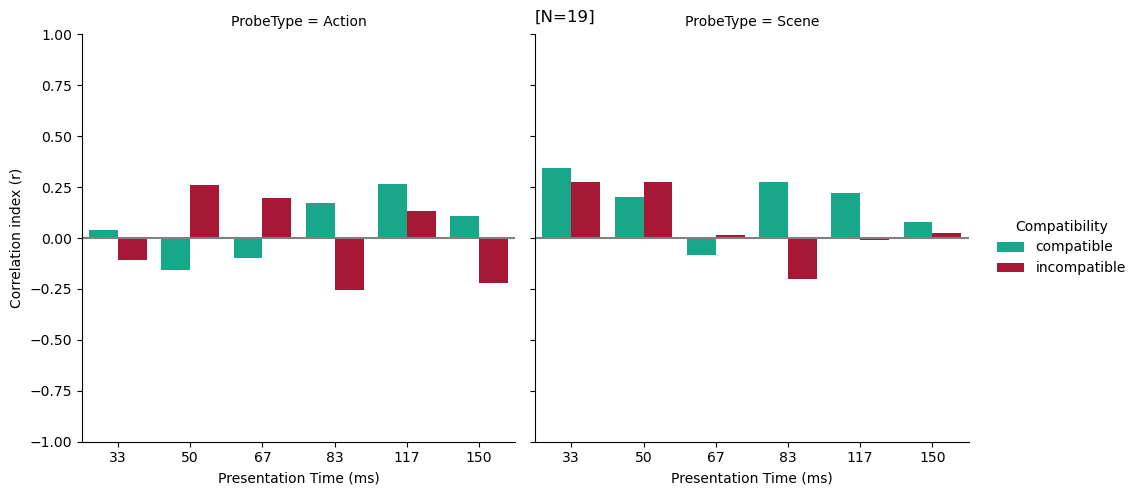

In [ ]:
g = sns.catplot(data=df_corrs,
                x='PT', y="corr", hue="Compatibility", col='ProbeType',
                palette=ur2,
                kind="bar")

g.set(ylim = (-1, 1))
g.refline(y=0, linestyle='solid')
g.set_xlabels('Presentation Time (ms)')
g.set_ylabels('Correlation index (r)')
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig('plots/correlation_speed-accuracy-tradeoff.png', dpi=250)
plt.show()

### Inverse efficiency (RT / d’)

In [ ]:
df_summary_rt['IES'] = df_summary_rt.meanRT / df_summary_rt.dprime

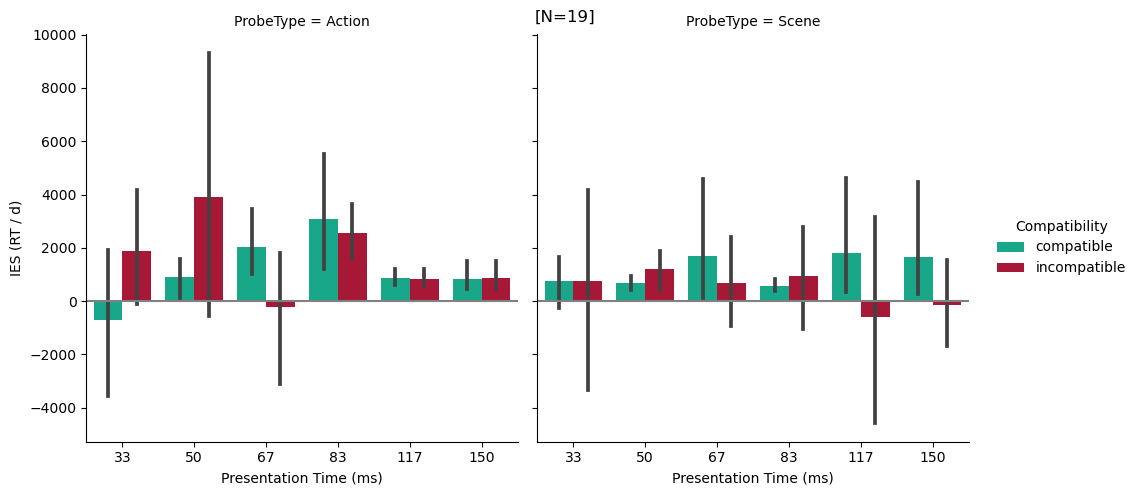

In [ ]:
df_ies = df_summary_rt.copy(deep=True)
df_ies = df_ies.replace([np.inf, -np.inf], np.nan)
df_ies.dropna(inplace=True)

g = sns.catplot(data=df_ies,
                x='PT', y="IES", hue="Compatibility", col='ProbeType',
                palette=ur2,
                kind="bar")

#g.set(ylim = (-1, 1))
g.refline(y=0, linestyle='solid')
g.set_xlabels('Presentation Time (ms)')
g.set_ylabels('IES (RT / d'')')
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig('plots/speed-accuracy-tradeoff_inverse-efficiency.png', dpi=250)
plt.show()